In [1]:
import pandas as pd
import os
import shutil
import random
import matplotlib.pyplot as plt

In [2]:
!pwd

/Users/emma-clairemccarthy/Desktop/Metis/projects/falcon_alert


In [22]:
'''
make train/test/val folders for each class and move images 
into respective folders
'''

# os.chdir('per_imgs')
# if os.path.isdir('train/per') is False:

#     os.makedirs('train/per')
#     os.makedirs('train/no_per')    
    
#     os.makedirs('val/per')
#     os.makedirs('val/no_per')
    
#     os.makedirs('test/per')
#     os.makedirs('test/no_per')
    
# for c in random.sample(os.listdir('per/'), 100):
#         shutil.move('per/' + c, 'val/per')
# for c in random.sample(os.listdir('per/'), 50):
#     shutil.move('per/' + c, 'test/per')
    
# for c in random.sample(os.listdir('no_per/'), 100):
#     shutil.move('no_per/' + c, 'val/no_per')
# for c in random.sample(os.listdir('no_per/'), 50):
#     shutil.move('no_per/' + c, 'test/no_per')

In [3]:
!pwd

/Users/emma-clairemccarthy/Desktop/Metis/projects/falcon_alert


In [4]:
train_path = 'per_imgs/train'
val_path = 'per_imgs/val'

In [5]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [61]:
train_batches = ImageDataGenerator(preprocessing_function=.vgg16.preprocess_input) \
    .flow_from_directory(directory = train_path, target_size = (256, 256), 
                         classes = ['per', 'no_per'], batch_size = 10)

val_batches = ImageDataGenerator(preprocessing_function=keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory = val_path, target_size = (256, 256), 
                         classes = ['per', 'no_per'], batch_size = 10)

Found 2207 images belonging to 2 classes.
Found 202 images belonging to 2 classes.


In [62]:
imgs, labels = next(train_batches)

In [9]:
def plotImages(images_arr):
    fig, axes = plt.subplots(10, 1, figsize = (40, 40))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

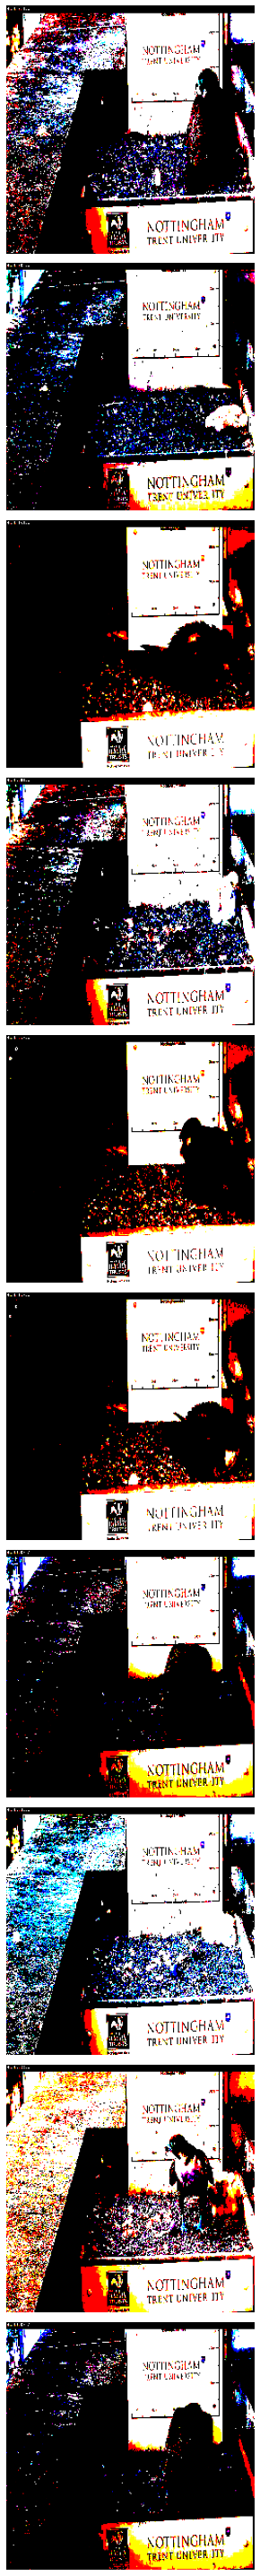

[[1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [66]:
plotImages(imgs)
print(labels)

In [71]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [72]:
model = Sequential([
    Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = 'same', input_shape=(256, 256, 3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax')
])

In [73]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 262144)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 524290    
Total params: 543,682
Trainable params: 543,682
Non-trainable params: 0
__________________________________________________

In [ ]:
# another option is to use binary_crossentropy and using sigmoid
# as the activation function for the output layer, which will 
# result in one output node

In [75]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [76]:
model.fit(x = train_batches, validation_data = val_batches, epochs = 10, verbose = 2)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @t

In [ ]:
model.predict()